## 对变化进行建模

-Graphics-
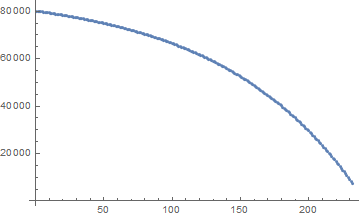

In [3]:
NestList[#+0.01 # -880.87&, 80000, 231] // ListPlot

-Graphics-
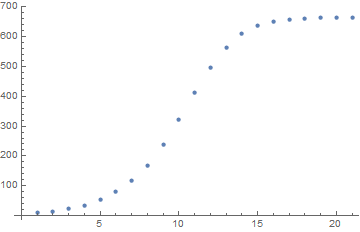

In [4]:
NestList[# + 0.00082 (665 - #) # &, 9.6, 20] // ListPlot

-Graphics-
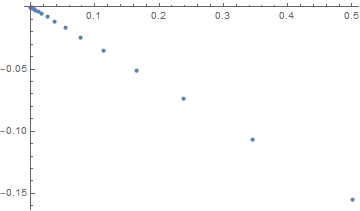

In [6]:
NestList[0.69 # &, 0.5, 20] // {# // Most, Differences@#} & // Transpose // ListPlot

-Graphics-
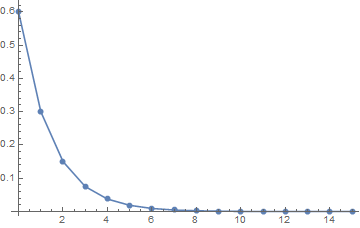

In [7]:
{Range[0, 15], NestList[0.5 # &, 0.6, 15]} // Transpose //  ListLinePlot[#, Mesh -> All, PlotRange -> All] &

-Graphics-
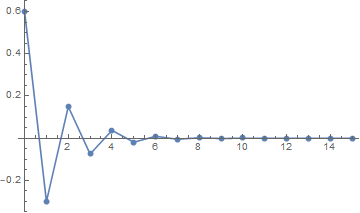

In [8]:
{Range[0, 15], NestList[-0.5 # &, 0.6, 15]} // Transpose //  ListLinePlot[#, Mesh -> All, PlotRange -> All] &

-Graphics-
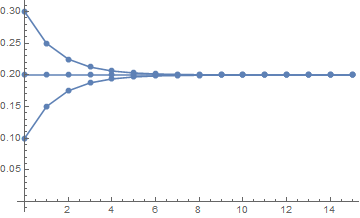

In [10]:
Table[{Range[0, 15], NestList[0.5 # + 0.1 &, i, 15]}, {i, {0.1, 0.2, 0.3}}] // 
Map[# // Thread &] // 
Map[ListLinePlot[#, Mesh -> All, PlotRange -> All] &] // 
Show[#, PlotRange -> All, AxesOrigin -> {0, 0}] &

-Graphics-
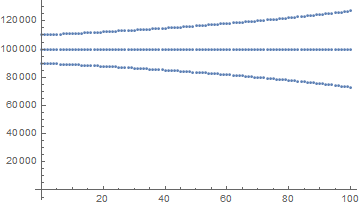

In [15]:
Table[{Range[0, 100], NestList[1.01 # - 1000 &, i, 100]}, {i, {90000, 100000, 110000}}] // 
Map[# // Thread &] // 
Map[ListPlot] // 
Show[#, PlotRange -> All, AxesOrigin -> {0, 0}] &

In [22]:
RSolve[{a[0]==c,a[n+1]==r*a[n]+b},a[n],n]//Apart//TeXForm

\left\{\left\{a(n)\to \frac{r^n (b+c r-c)}{r-1}-\frac{b}{r-1}\right\}\right\}

-Graphics-
-Graphics-
-Graphics-
-Graphics-
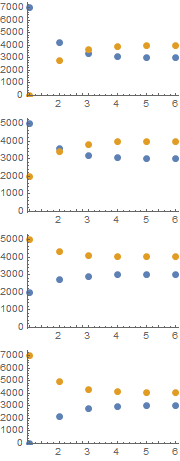

In [28]:
Table[NestList[{0.6 #[[1]] + 0.3 #[[2]], 0.4 #[[1]] + 0.7 #[[2]]} &,j,5], {j,{{7000,0}, {5000, 2000}, {2000, 5000}, {0, 7000}}}] // 
Map[Transpose] // 
Map[ListPlot[#,PlotRange->All,PlotStyle -> PointSize[Large]]&]//
Column

-Graphics-
-Graphics-
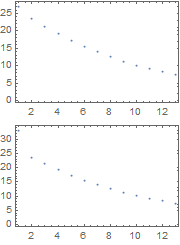

In [29]:
NestList[{#[[1]] - 0.1 #[[2]], #[[1]] - 0.1 #[[2]]} &, {27, 33}, 12] //
    Transpose // 
  Map[ListPlot[#, PlotRange -> All, Frame -> True] &] // Column

-Graphics-
-Graphics-
-Graphics-
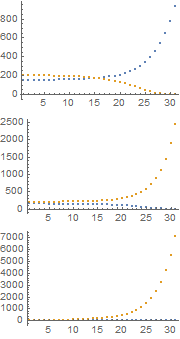

In [34]:
Table[NestList[{1.2 #[[1]]-0.001 #[[1]]#[[2]],  1.3 #[[2]]-0.002 #[[1]] #[[2]]} &,j, 30],{j,{{151, 199}, {149, 201}, {10, 10}}}] // 
Map[Transpose] //
Map[ListPlot[#, PlotRange -> All] &] // 
Column

-Graphics-
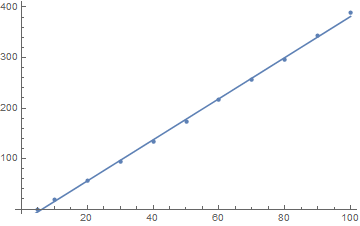

In [7]:
With[{data = {Range[10, 100, 10] // Prepend[#, 5] &, {0, 19, 57, 94,  134, 173, 216, 256, 297, 343, 390}} // Thread}, 
 Show[ListPlot[data], Plot[Evaluate@Fit[data, {1, x}, x], {x, 0, 100}]]]

In [11]:
With[{data = {{7, 14, 21, 28, 35, 42}, {8, 41, 133, 250, 280, 297}} // Thread}, 
NonlinearModelFit[data, a Exp[b t], {a, b}, t]] // Normal // TeXForm

47.3039 e^{0.0468901 t}

In [12]:
With[{data = {{0.5, 1.0, 1.5, 2.0, 2.5}, {0.7, 3.4, 7.2, 12.4,  20.1}} // Thread}, Fit[data, {x^2}, x]] // TeXForm

3.18693 x^2

In [39]:
f = With[{data = {Range[3.0, 3.9, 0.1], {20.08, 22.20, 24.53, 27.12,  29.96, 33.11, 36.60, 40.45, 44.70, 49.40}} // Thread}, 
   Interpolation[data, Method -> "Spline"]];
f[3.45]//TeXForm
E^3.45//TeXForm
NIntegrate[f[x],{x,3.3,3.6}]//TeXForm
Integrate[Exp[x],{x,3.3,3.6}]//TeXForm
f=.;

31.4935
31.5004
9.48505
9.4856

In [46]:
RandomReal[{0, 1}, {100000, 2}] //  Count[{a_, b_} /; a^2 + b^2 <= 1.] // #*4/100000. &//TeXForm

3.14276

In [56]:
RandomReal[{0, 12}, {1000000, 3}] //  Count[{x_, y_, z_} /; x^2/2. + y^2/4. + z^2/8. <= 16.] // #/1000000*12^3. &//TeXForm
NIntegrate[1, {x, y, z} \[Element]  ImplicitRegion[x^2/2 + y^2/4 + z^2/8 <= 16, {x, y, z}]]/8//TeXForm
Integrate[1, {x, y, z} \[Element] ImplicitRegion[x^2/2 + y^2/4 + z^2/8 <= 16, {x, y, z}]]//TeXForm
ImplicitRegion[x^2/2 + y^2/4 + z^2/8 <= 16, {x, y, z}] // Volume//TeXForm

267.646
268.083
\frac{2048 \pi }{3}
\frac{2048 \pi }{3}

In [68]:
Integrate[1, {x, y, z} \[Element] ImplicitRegion[z <= 8 - x^2 - y^2 && z >= x^2 + 3 y^2, {x, y, z}]]//TeXForm
%//N//TeXForm
ImplicitRegion[x^2 + 3 y^2<=z <= 8 - x^2 - y^2  , {x, y, z}]//Volume//TeXForm
RandomReal[{-3, 8}, {100000, 3}] // Count[{x_, y_, z_} /; x^2 + 3 y^2 <= z <= 8 - x^2 - y^2] // #/ 100000*11^3. &//TeXForm

8 \sqrt{2} \pi
35.5431
8 \sqrt{2} \pi
36.1633

In [74]:
NestWhileList[PadLeft[IntegerDigits[#^2], 8] /. {_, _, b_, c_, d_, e_, _, _} :> FromDigits@{b, c, d, e} &, 2041, # != 0 &]//TeXForm
NestWhileList[FromDigits[PadLeft[IntegerDigits[#^2], 8][[3 ;; 6]]] &, 2041, # !=  0 &]//TeXForm

\{2041,1656,7423,1009,180,324,1049,1004,80,64,40,16,2,0\}
\{2041,1656,7423,1009,180,324,1049,1004,80,64,40,16,2,0\}

-Graphics-
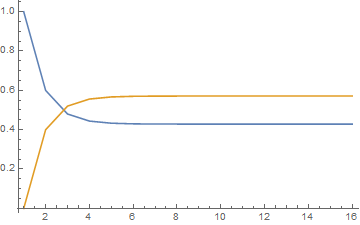

In [2]:
NestList[{0.6 #[[1]] + 0.3 #[[2]], 0.4 #[[1]] + 0.7 #[[2]]} &, {1, 0}, 15] // Thread // ListLinePlot[#,PlotRange->All]&

In [3]:
Maximize[{x + y, x + y <= 6, 3 x - y <= 9, x >= 0, y >= 0}, {x, y}]// TeXForm

\left\{6,\left\{x\to \frac{15}{4},y\to \frac{9}{4}\right\}\right\}

-Graphics-
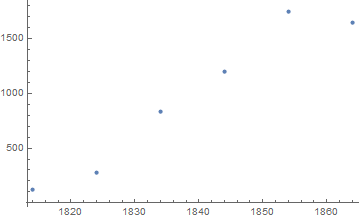

In [3]:
ListPlot[{1804 + Range[10, 60, 10], {125, 275, 830, 1200, 1750, 1650}} // Thread]